<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/purna135/ML-Datasets/main/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.drop(["Gender"], inplace = True, axis = 1)

In [5]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


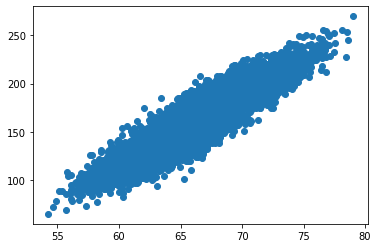

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df["Height"], df["Weight"])

In [7]:
# As the dataset is large so we are taking some points
X = df["Height"][:200]
Y = df["Weight"][:200]

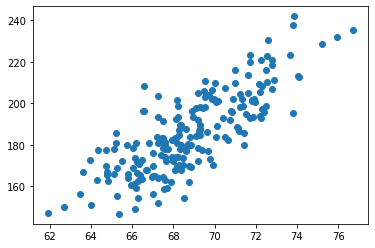

In [8]:
plt.scatter(X, Y)

In [9]:
X.shape

(200,)

In [10]:
X = X.values.reshape(-1, 1) # to train model we need a 2D array, so we are reshaping it to 2D (200 rows, 1 cols)

In [11]:
X.shape

(200, 1)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [13]:
X_train.shape

(140, 1)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.predict(X_test)

array([202.42772225, 163.93751992, 161.84842036, 178.62966295,
       189.75711108, 180.52660301, 199.75220299, 175.21094339,
       159.10700302, 182.48066941, 182.49316698, 228.15698598,
       186.34977612, 159.28176073, 181.88492559, 189.40368422,
       165.31318567, 223.77628971, 181.60129903, 164.53114187,
       206.63788901, 215.59105305, 180.39696616, 169.55293439,
       183.37603486, 191.72272546, 170.67108965, 190.3864735 ,
       174.10716933, 179.26089108, 149.63243912, 145.06678513,
       200.32720334, 197.90147501, 182.87869438, 207.98137756,
       175.0800427 , 175.04481456, 198.28462606, 178.52220574,
       183.8890044 , 172.67921416, 168.02354226, 192.52954079,
       180.87828719, 232.69717995, 182.4894624 , 168.01721067,
       188.64168375, 185.30866665, 185.66877162, 190.14926888,
       193.20402122, 170.72558983, 166.38263697, 188.02942834,
       162.09929792, 188.04333922, 190.23700354, 207.23993561])

In [16]:
y_pred = lr.predict(X_test)

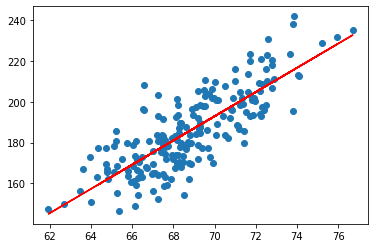

In [17]:
plt.scatter(X, Y)
plt.plot(X_test, y_pred, color = "r")

In [18]:
# Slope of the line (m)
lr.coef_

array([5.93199026])

In [19]:
# Y intercept of line
lr.intercept_

-222.34481302666856

In [20]:
m = lr.coef_
c = lr.intercept_

In [21]:
# take a sample point
x = X_test[0][0]
x

71.6070857988906

In [22]:
# Equation of line Y = M*X + C 
y = m * x + c

In [23]:
y

array([202.42772225])

In [24]:
lr.predict(x.reshape(-1,1))

array([202.42772225])

# Custom Linear Regression

In [25]:
class CustomRL():
  def __init__(self):
    self.m = None
    self.c = None

  def fit(self, x, y):
    p = 0
    q = 0
    for i in range(x.shape[0]):
      p = p + (y[i] - y.mean()) * (x[i] - x.mean())
      q = q + (x[i] - x.mean()) ** 2
    
    self.m = p/q
    self.c = y.mean() - self.m * x.mean()
  
  def predict(self, x_test):
    return self.m * x_test + self.c

In [26]:
clr = CustomRL()

In [27]:
clr.fit(X_train, y_train.values)

In [ ]:
clr.predict(X_test)

In [29]:
y_custom = clr.predict(X_test)

In [30]:
y_sklealn = lr.predict(X_test)

In [31]:
y_sklealn

array([202.42772225, 163.93751992, 161.84842036, 178.62966295,
       189.75711108, 180.52660301, 199.75220299, 175.21094339,
       159.10700302, 182.48066941, 182.49316698, 228.15698598,
       186.34977612, 159.28176073, 181.88492559, 189.40368422,
       165.31318567, 223.77628971, 181.60129903, 164.53114187,
       206.63788901, 215.59105305, 180.39696616, 169.55293439,
       183.37603486, 191.72272546, 170.67108965, 190.3864735 ,
       174.10716933, 179.26089108, 149.63243912, 145.06678513,
       200.32720334, 197.90147501, 182.87869438, 207.98137756,
       175.0800427 , 175.04481456, 198.28462606, 178.52220574,
       183.8890044 , 172.67921416, 168.02354226, 192.52954079,
       180.87828719, 232.69717995, 182.4894624 , 168.01721067,
       188.64168375, 185.30866665, 185.66877162, 190.14926888,
       193.20402122, 170.72558983, 166.38263697, 188.02942834,
       162.09929792, 188.04333922, 190.23700354, 207.23993561])

In [ ]:
y_custom

In [33]:
# Slope and Intercept for sklean linear regression
print("Slope", lr.coef_)
print("Intercept", lr.intercept_)

Slope [5.93199026]
Intercept -222.34481302666856


In [34]:
# Slope and Intercept for our custom function
print("Slope", clr.m)
print("Intercept", clr.c)

Slope [5.93199026]
Intercept [-222.34481303]


In [35]:
import numpy as np

In [43]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)

In [ ]:
X_train

In [44]:
class MyLinearRegression():
  def __init__(self, learning_rate, interation):
    self.learning_rate = learning_rate
    self.interation = interation
  
  def fit(self, X, Y):
    row, col = X.shape
    self.W = np.random.rand(col)
    self.c = np.random.randint(0, 10)

    for i in range(self.interation):
      y_pred = self.predict(X)

      dW = -2 * (X.T).dot(Y - y_pred) / row
      dc = -2 * (Y - y_pred).sum() / row

      self.W = self.W - self.learning_rate * dW
      self.c = self.c - self.learning_rate * dc


      plt.scatter(X, Y)
      plt.plot(X, y_pred, color = "r")
      plt.title("Interation: " + str(i))
      plt.show()

  def predict(self, X):
    return X.dot(self.W) + self.c

In [ ]:
mlr = MyLinearRegression(0.1, 50)
mlr.fit(X_train, y_train)

In [40]:
mlr.W

array([73.12456506])

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [57]:
mean_absolute_error(y_test, y_pred)

9.484726087655973

In [58]:
mean_squared_error(y_test, y_pred)

133.43294912589673

In [59]:
r2_score(y_pred, y_test)

0.5612828319389999

In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

11.551318068770192

In [63]:
X = np.linspace(-10, 15, 200)
# y = 2x^2 + 3x + 4
Y = 2 * X**2 + 3*X + 4 + np.random.randn(200) * 50

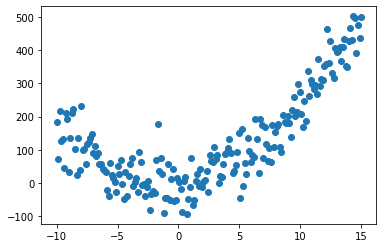

In [64]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

In [66]:
X.shape

(200,)

In [67]:
X = X.reshape(-1, 1)

In [68]:
X.shape

(200, 1)

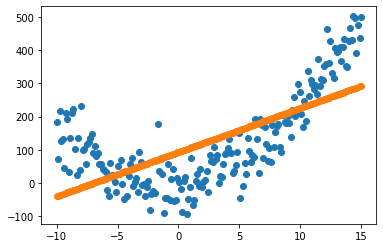

In [70]:
lr = LinearRegression()
lr.fit(X, Y)
y_pred = lr.predict(X)

plt.scatter(X, Y)
plt.scatter(X, y_pred)
plt.show()

In [87]:
X.shape

(200, 1)

In [88]:
x = X.reshape(-1)
x.shape

(200,)

In [95]:
x = X.reshape(-1)
x = np.dstack([x, x**2])[0]
x.shape

(200, 2)

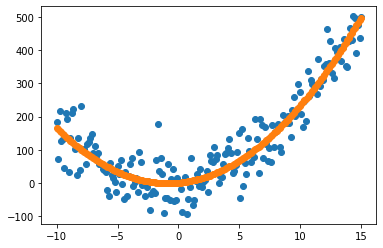

In [96]:
lr.fit(x, Y)
y_pred = lr.predict(x)

plt.scatter(X, Y)
plt.scatter(X, y_pred)
plt.show()

In [101]:
from sklearn.preprocessing import PolynomialFeatures
po = PolynomialFeatures(degree = 2)
x = po.fit_transform(X)
x.shape

(200, 3)

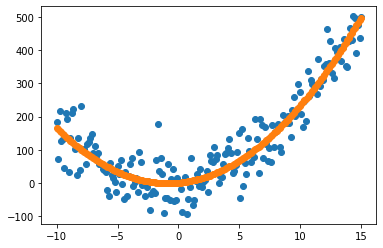

In [102]:
lr.fit(x, Y)
y_pred = lr.predict(x)

plt.scatter(X, Y)
plt.scatter(X, y_pred)
plt.show()

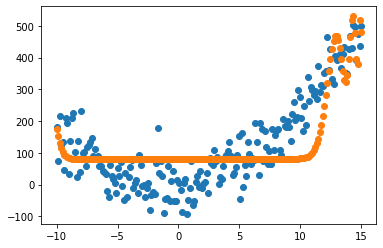

In [109]:
from sklearn.preprocessing import PolynomialFeatures
po = PolynomialFeatures(degree = 50)
x = po.fit_transform(X)


lr.fit(x, Y)
y_pred = lr.predict(x)

plt.scatter(X, Y)
plt.scatter(X, y_pred)
plt.show()

In [110]:
lr.coef_

array([ 4.10390522e-45,  7.23071556e-45, -3.29544109e-48, -7.35428678e-51,
        6.96113983e-54,  8.12620004e-56, -1.33794828e-58, -3.18618382e-58,
        4.70505070e-78,  6.32165374e-77,  7.77730699e-76,  9.01458911e-75,
        1.09369691e-73,  1.26947659e-72,  1.52141550e-71,  1.76393301e-70,
        2.09006508e-69,  2.41432532e-68,  2.82863081e-67,  3.24740066e-66,
        3.75978330e-65,  4.27909028e-64,  4.88967859e-63,  5.50196415e-62,
        6.19305516e-61,  6.86812313e-60,  7.59442070e-59,  8.26958671e-58,
        8.94913265e-57,  9.52224486e-56,  1.00332244e-54,  1.03654190e-53,
        1.05573717e-52,  1.04954478e-51,  1.02253179e-50,  9.65322536e-50,
        8.85240673e-49,  7.77119158e-48,  6.53154907e-47,  5.13909270e-46,
        3.76759320e-45,  2.46321539e-44,  1.40840711e-43,  6.17177648e-43,
        1.84678357e-42, -4.93409284e-43,  3.02795226e-44,  2.49531310e-45,
       -4.09211048e-46,  1.91577589e-47, -3.11976811e-49])